<a href="https://colab.research.google.com/github/cruz-marco/dex_files/blob/main/Day_9Din%C3%A2mica_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício de Classificação - Predição na qualidade do leite

Feature:
- pH
- Temprature
- Taste
- Odor
- Fat
- Turbidity
- Colour

Target:
- Grade


To-Dos do exercício:

- Transformar a variável target (Grade) de string para numérica (0,1,2). Lembrando que é um problema multiclasse (Uma única coluna de target) e não multi-label (Múltiplas colunas de target).
- Separação de Treino X Teste:
> Separa o conjunto de treino e teste com os dados resultante em 50% para cada.
- Normalização dos dados:
> Utilizando a função StandardScaler já fornecida, normaliza os dados de treino (Somente é usado o fit em cima dos dados de treino) e teste das colunas pH, Temperature e Colour.
- Treinar o modelo
- Validação do modelo:
> Analisar a acurácia do modelo com dados de teste
> Verificar outras métricas de performance do modelo



Dataset: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

# Day 9 Dinâmica Classificação
- Marco Cruz  - 13540
- Abel Brasil - 15010
- Rai Beirão - 14074
- Nicolas Campos - 14563
- Henrique Carvalho - 14527
- Adriano Guimarães - 13742
- Victor Baptista - 10191

# Importação das bibliotecas que irá utilizar

In [40]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/day9/milknew.csv')

# Análise primária (Estatística/ Valores nulos/ Dados coerentes) e EDA

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df.columns = ['ph', 'temp', 'taste', 'odor', 'fat', 'turb', 'colour',
       'target']

In [6]:
df.describe(percentiles=[0.1,0.8,0.9,0.95,0.99])

,ph,temp,taste,odor,fat,turb,colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
10%,4.500000,36.000000,0.000000,0.000000,0.000000,0.000000,245.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
80%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
90%,8.600000,55.000000,1.000000,1.000000,1.000000,1.000000,255.000000
95%,9.000000,66.000000,1.000000,1.000000,1.000000,1.000000,255.000000
99%,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


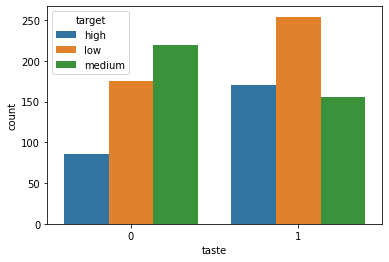

In [7]:
sns.countplot(data=df,x='taste',hue='target')

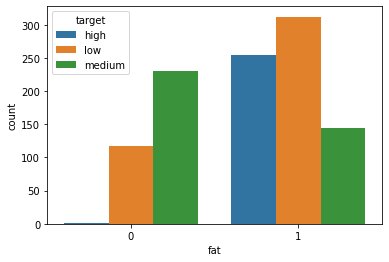

In [8]:
sns.countplot(data=df,x='fat',hue='target')

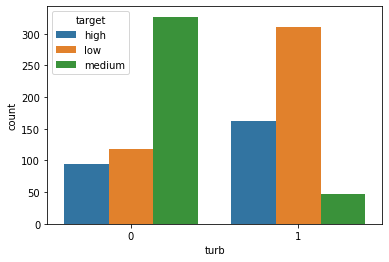

In [9]:
sns.countplot(data=df,x='turb',hue='target')

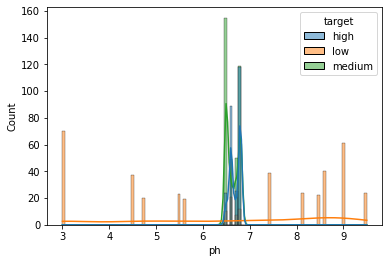

In [10]:
sns.histplot(data=df,kde=True,x='ph',hue='target')

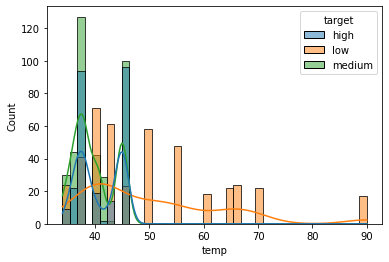

In [11]:
sns.histplot(data=df,kde=True,x='temp',hue='target')

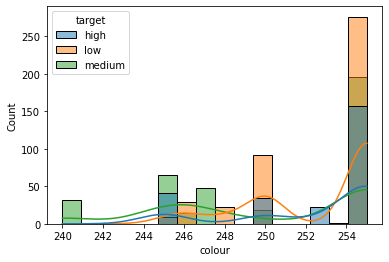

In [12]:
sns.histplot(data=df,kde=True,x='colour',hue='target')

# Limpeza e tratamento dos dados

## IQR



In [13]:
df_aux = df.copy()
for column in ['ph', 'temp','colour']:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  df_aux = df_aux[(df_aux[column] >= Q1 - 2.5*IQR) & (df_aux[column] <= Q3 + 2.5*IQR)]
  

df = df_aux
df

,ph,temp,taste,odor,fat,turb,colour,target
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
9,6.7,45,1,1,0,0,247,medium
...,...,...,...,...,...,...,...,...
1050,6.6,37,1,1,1,1,255,high
1052,6.5,40,1,0,0,0,250,medium
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high


## Design de Experimentos Fatorial



In [14]:

df['taste'] = df['taste'].map({1:1,0:-1})
df['odor'] = df['odor'].map({1:1,0:-1})
df['fat'] = df['fat'].map({1:1,0:-1})
df['turb'] = df['turb'].map({1:1,0:-1})

lista = ['taste','odor','fat','turb']
for i in range(len(lista)):
  if i == len(lista)-1:
    break
  else:
    for j in range(i+1,len(lista)):
      column_1 = lista[i]
      column_2 = lista[j]
      
      df[column_1+'_'+column_2] = df[column_1]*df[column_2]


## Transformação das categorias em números.

In [15]:
df['target'] = df['target'].map({
    'low': 0,
    'medium': 1,
    'high': 2
})

In [16]:
colz = ['ph', 'temp', 'colour']

In [17]:
X = df[colz]
Y = df['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [19]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep='\n')

(340, 3)
(340,)
(340, 3)
(340,)


In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train_scaled = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [22]:
clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
y_pred = clf.predict(X_test_scaled)

In [27]:
metrics.f1_score(y_test, y_pred, average=None)

array([0.98039216, 0.86215539, 0.75652174])

In [29]:
metrics.accuracy_score(y_test, y_pred)

0.8352941176470589

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


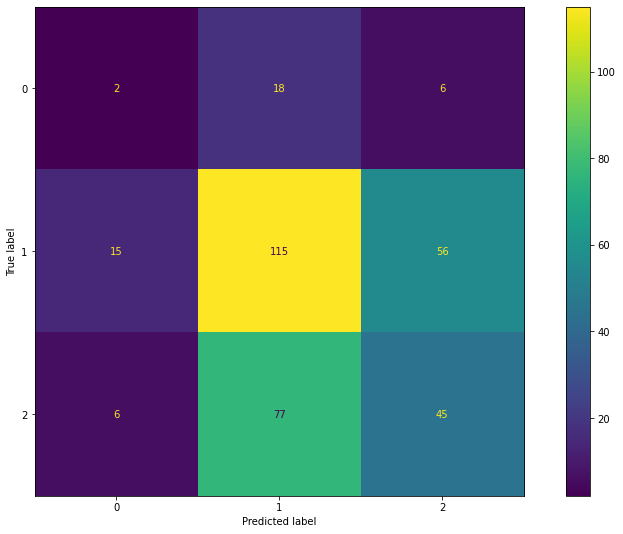

In [39]:
fig, ax = plt.subplots(figsize=(15,9))

plot_confusion_matrix(clf, X_train_scaled, y_test, ax=ax)

plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.81      0.92      0.86       186
           2       0.85      0.68      0.76       128

    accuracy                           0.84       340
   macro avg       0.89      0.86      0.87       340
weighted avg       0.84      0.84      0.83       340

